                               **SUPERVISED HOUSE PREDICTION MACHINE LEARNING MODEL**
   BY-
     GAURAV KASHYAP       SIDDHARTHA SAMANT
     Birla Institute of Technology,Mesra
     
THE FOLLOWING SUPERVISED LEARNING BASED PREDICTION PROJECT HAS BEEN MADE USING THE KAGGLE COMPETITION HOUSE DATA SET
WHICH CONSTITUTED OF A TRAINING AND A TEST DATA SET.

DIFFERENT REGRESSION MODELS,OPTIMISERS AND PLOTTING TOOLS HAVE BEEN USED TO PROCESS ,CLEAN AND CREATE A TRAINABLE DATASET.

**FINALLY MODEL DEPLOYEMENT,USING FLASK AND HTML HAS BEEN DONE,THE CODES FOR THE FLASK APP AND THE HTML PAGE IS ALSO PRESENT IN THE GITHUB REPOSITARY**
     

In [107]:
pwd

'E:\\python35'


# IMPORTING THE LIBRARIES

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
#config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
#matplotlib inline


# LOADING THE TRAIN AND TEST CSV FORMAT DATASETS

In [111]:
# Load train and Test set
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test (1).csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# dropping the ID coloumn as it is just an identifier

In [112]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the 'Id' column since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


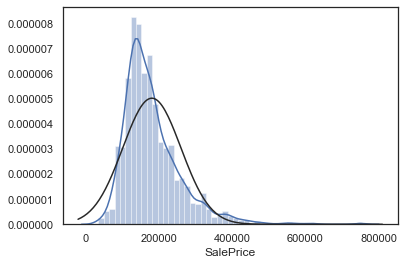

In [113]:
# Getting Description
train['SalePrice'].describe()



####################
# Plot Histogram
sns.distplot(train['SalePrice'] , fit=norm);




 mu = 180921.20 and sigma = 79415.29



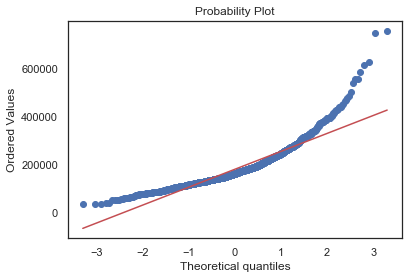

In [114]:
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


**THE DATA SET CONSISTS OF 80 COLOUMNS,WE TRY TO FIND OUT THE TOP 15 FEATURES THAT ARE HEAVILY CORRELATED FROM THE TARGET VARIABLE,THAT IS THE SALEPRICE**

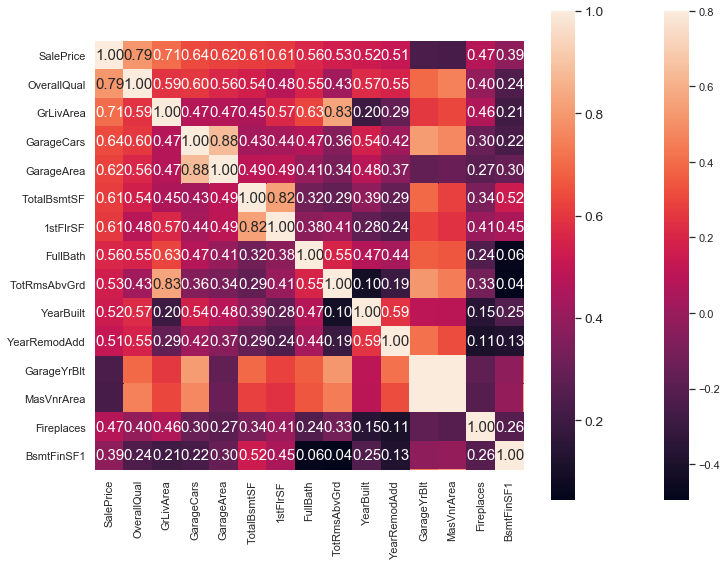

In [115]:
#################
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


################
# Top 15 Heatmap
k =15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# MAKING A DATA SET OF THE TOP 15 CORRELATED FEATURES

In [116]:
most_corr = pd.DataFrame(cols)
#most_corr.columns = ['Most Correlated Features']

columns = train.columns.tolist()

columns = [c for c in columns if c in cols]
train=train[columns]

columns1 = [c for c in columns if c in cols[1:]]

test=test[columns1]
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,706,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,978,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,486,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,216,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,655,1145,1145,2198,2,9,1,2000.0,3,836,250000


In [117]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns


################
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')


Total Features:  0 categorical + 15 numerical = 15 features


**VISUALISING DATA CAN HELP A LOT TO GAIN INSIGHTS ON PATTERNS AND THE LINEARITY AND NON LINEARITY OF THE FEATURE'S VARIATIONS
HENCE WE TRY TO VISUALIZE HOW EVERY FEATURE IS VARYING WITH SALEPRICE**

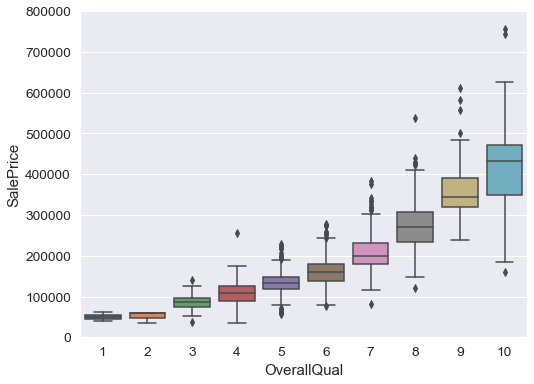

In [118]:

# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


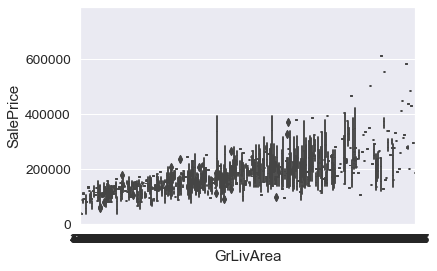

In [119]:

############
# Living Area vs Sale Price
sns.boxplot(x=train['GrLivArea'], y=train['SalePrice'])


##############
# Removing outliers manually (Two points in the bottom right)
train = train.drop(train[(train['GrLivArea']>4000) 
                         & (train['SalePrice']<250000)].index).reset_index(drop=True)


##############
# Living Area vs Sale Price
sns.boxplot(x=train['GrLivArea'], y=train['SalePrice'])


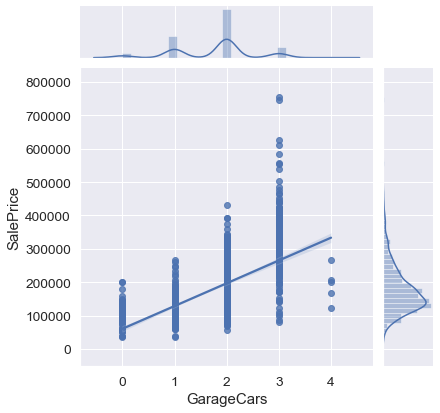

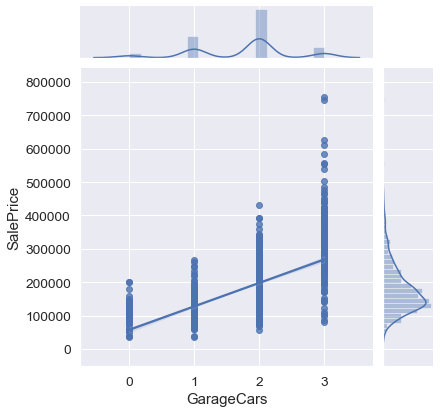

In [120]:

############
# Garage Area vs Sale Price
sns.jointplot(x=train['GarageCars'], y=train['SalePrice'],kind='reg')



#########
# Removing outliers manually (More than 4-cars, less than $300k)
train = train.drop(train[(train['GarageCars']>3) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)



#########
# Garage Area vs Sale Price
sns.jointplot(x=train['GarageCars'], y=train['SalePrice'],kind='reg')


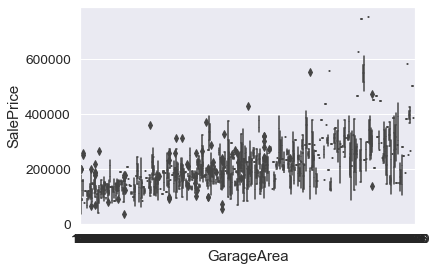

In [121]:
# Garage Area vs Sale Price
sns.boxplot(x=train['GarageArea'], y=train['SalePrice'])
plt.show()


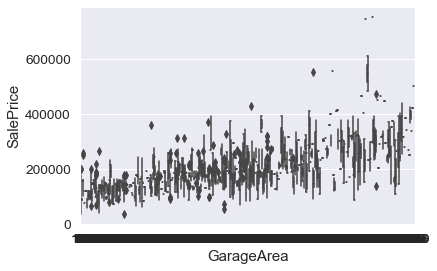

In [122]:
##########
# Removing outliers manually (More than 1000 sqft, less than $300k)
train = train.drop(train[(train['GarageArea']>900) 
                         & (train['SalePrice']<250000)].index).reset_index(drop=True)



##########
# Garage Area vs Sale Price
sns.boxplot(x=train['GarageArea'], y=train['SalePrice'])


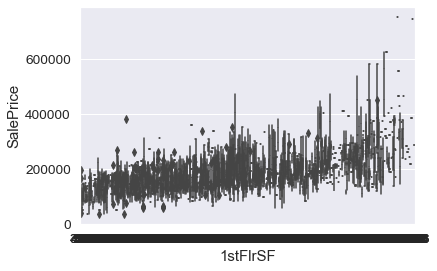

In [123]:
##########
# Basement Area vs Sale Price
sns.boxplot(x=train['TotalBsmtSF'], y=train['SalePrice'])



############
# First Floor Area vs Sale Price
sns.boxplot(x=train['1stFlrSF'], y=train['SalePrice'])



############
# Total Rooms vs Sale Price
#sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'])



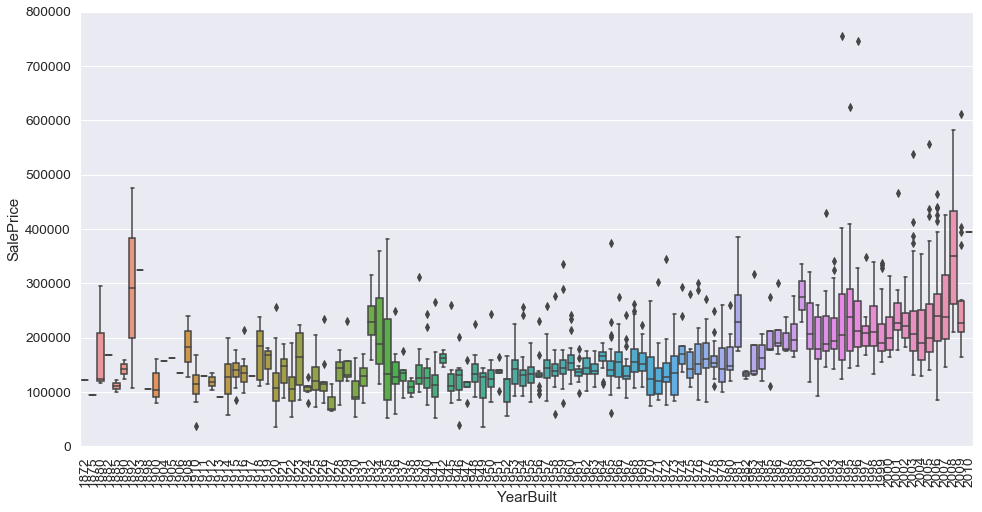

In [124]:
#############
# Total Rooms vs Sale Price
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


** HERE WE SET THE TARGET VARIABLE TO TRAIN OUR MODEL ON ,DROP THAT FEATURE TO MAKE A SEPARATE y_train FEATURE ,THEN WE COMBINE THE TRAIN AND TEST DATA SETS **

In [125]:

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))


Train data size is : (1445, 15)
Test data size is : (1459, 14)
Combined dataset size is : (2904, 14)


# NULL/NAN VALUES REPLACING

In [126]:
all_data["Fireplaces"] = all_data["Fireplaces"].fillna(0)

for col in ( 'GarageArea', 'GarageCars', 'BsmtFinSF1','TotalBsmtSF','FullBath','1stFlrSF','OverallQual','GrLivArea','TotRmsAbvGrd','YearBuilt','FullBath','YearRemodAdd','GarageYrBlt'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [127]:
# Adding Total Square Feet feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] 


#  FEATURE SCALING IMPLEMENTATION ON TARGET VARIABLE

In [128]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])



 mu = 12.02 and sigma = 0.40



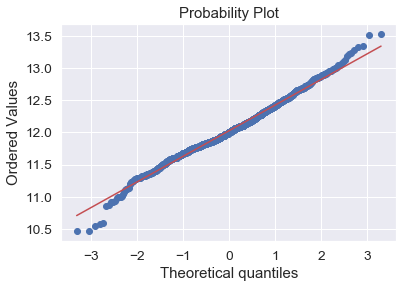

In [129]:
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


In [130]:
y_train = train.SalePrice.values



###################
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index



all_data = pd.get_dummies(all_data)
    

In [131]:
############
train = all_data[:ntrain]
test = all_data[ntrain:]

train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1445 non-null   int64  
 1   YearBuilt     1445 non-null   int64  
 2   YearRemodAdd  1445 non-null   int64  
 3   MasVnrArea    1445 non-null   float64
 4   BsmtFinSF1    1445 non-null   float64
 5   TotalBsmtSF   1445 non-null   float64
 6   1stFlrSF      1445 non-null   int64  
 7   GrLivArea     1445 non-null   int64  
 8   FullBath      1445 non-null   int64  
 9   TotRmsAbvGrd  1445 non-null   int64  
 10  Fireplaces    1445 non-null   int64  
 11  GarageYrBlt   1445 non-null   float64
 12  GarageCars    1445 non-null   float64
 13  GarageArea    1445 non-null   float64
 14  TotalSF       1445 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 169.5 KB


In [132]:
################
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



# LINEAR REGRESSION,LASSO ,RIDGE AND ELASTICNET

**Linear regression finds the coefficient values that maximize R²/minimize RSS. But this may not be the best model,
and will give a coefficient for each predictor provided. This includes terms with little predictive power. This results 
in a high-variance, 
low
bias model. We therefore have the potential to improve our model by trading some of that variance with bias
to reduce our overall error.
This trade comes in the form of regularization, in which we modify our cost function to restrict the values of our
coefficients. 
This allowsus to trade our excessive 
variance for some bias, potentially reducing our overall error.


**LASSO ,RIDGE ,ELASTINET ARE FEW WAYS OF VAYRYING THE LOSS FUNCTION

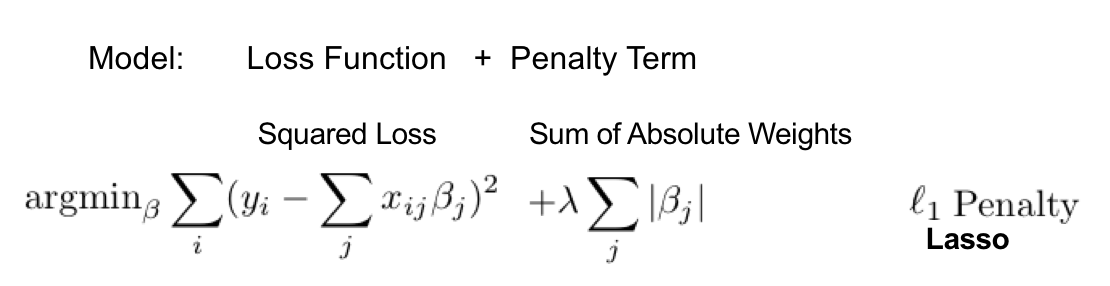

In [133]:
from IPython.display import Image
Image(filename='lasso.png')

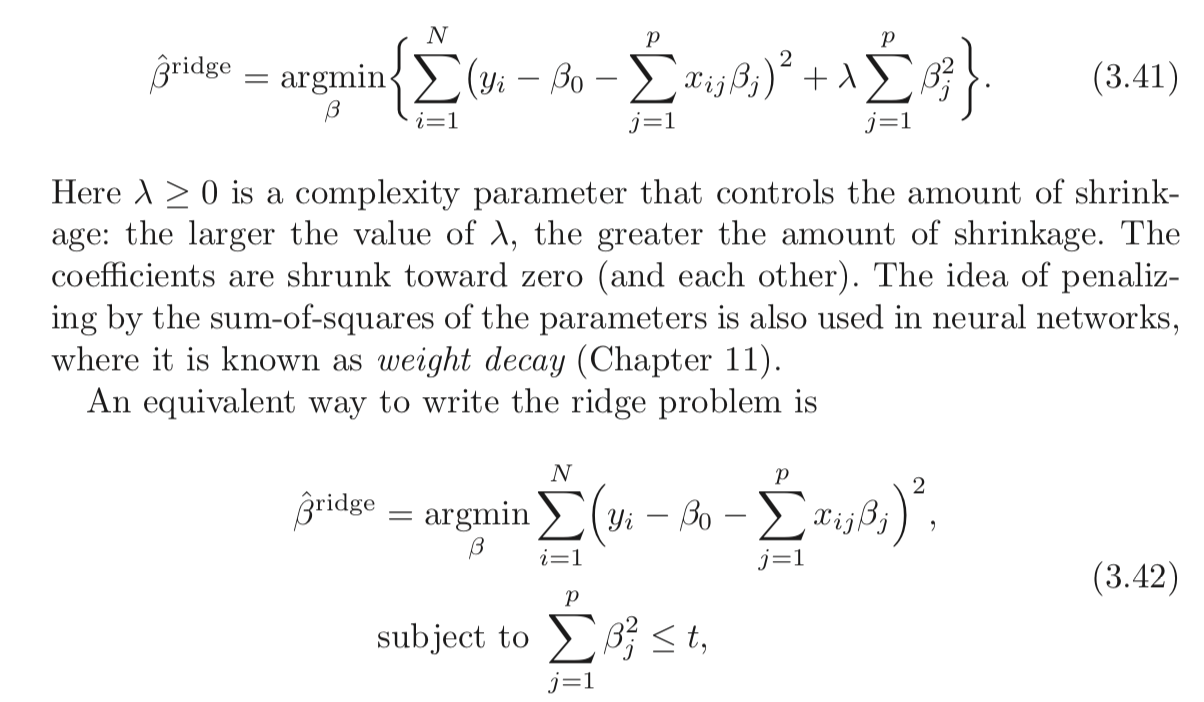

In [134]:
from IPython.display import Image
Image(filename='RID.png')

In [135]:

###############
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)




#############
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)






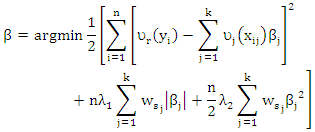

In [136]:
from IPython.display import Image
Image(filename='EL.png')

In [137]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



In [138]:

#############
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))







Lasso score: 0.1416 (0.0024)

ElasticNet score: 0.1416 (0.0024)

Kernel Ridge score: 0.1448 (0.0061)

Gradient Boosting score: 0.1473 (0.0083)

Xgboost score: 0.1455 (0.0039)

LGBM score: 0.1417 (0.0037)



**Model averaging can be improved by weighting the contributions of each sub-model to the combined prediction by the expected performance of the submodel. This can be extended further by training an entirely new model to learn how to best combine the contributions from each submodel. This approach is called stacked generalization, or stacking for short, and can result in better predictive performance than any single contributing model.**

In [140]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):                       
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    
    
    
    
############
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


 


Stacking Averaged models score: 0.1379 (0.0028)


In [141]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

print(train.values)



0.10773203234748019
[[7.000e+00 2.003e+03 2.003e+03 ... 2.000e+00 5.480e+02 1.712e+03]
 [6.000e+00 1.976e+03 1.976e+03 ... 2.000e+00 4.600e+02 2.524e+03]
 [7.000e+00 2.001e+03 2.002e+03 ... 2.000e+00 6.080e+02 1.840e+03]
 ...
 [7.000e+00 1.941e+03 2.006e+03 ... 1.000e+00 2.520e+02 2.340e+03]
 [5.000e+00 1.950e+03 1.996e+03 ... 1.000e+00 2.400e+02 2.156e+03]
 [5.000e+00 1.965e+03 1.965e+03 ... 1.000e+00 2.760e+02 2.512e+03]]


In [142]:


#############
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 
    
    
    
###########
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))






Averaged base models score: 0.1374 (0.0033)



In [143]:
##############
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))




#############
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))




0.07201433281023609
0.10689237054785283


In [144]:
#############
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.10 + lgb_train_pred*0.20 ))


RMSLE score on train data:
0.10189844836394045


In [168]:
############
# Example
Stacked = 1/(0.1077)
XGBoost = 1/(0.1177)
LGBM = 1/(0.1159)
Sum = Stacked + XGBoost + LGBM
Stacked = Stacked/Sum
XGBoost = XGBoost/Sum
LGBM = LGBM/Sum
print(Stacked, XGBoost, LGBM)


############
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*Stacked +
               xgb_train_pred*XGBoost + lgb_train_pred*LGBM))


ensemble = stacked_pred*Stacked + xgb_pred*XGBoost + lgb_pred*LGBM


##########
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)


0.35158188821434966 0.32171086967447293 0.3267072421111774
RMSLE score on train data:
0.09286288421370306


**WE HAVE MADE AN ENSEMBLE MODEL WHICH TAKES CONTRIBUTION FROM ALL SUB MODELS,NEXT WE SEE HOW TO DEPLOY ANY MODEL 
USING FLASK AND HTML,FOR SHOWING WE HAVE PICKLED A RIDGE REGRESSION MODEL AND WILL BE USING IT FOR PREDICTION,

THE CODES ARE PRESENT IN THE GITHUB REPO.**

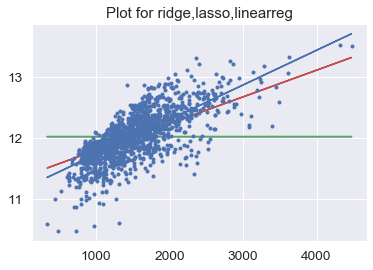

In [149]:

x=train['GrLivArea']
x=np.array(x)
k=x.reshape(x.shape[0],-1)
#k.reshape(-1,1)    
    #Fit the model
linreg = LinearRegression()
linreg.fit(k,y_train)
y_pred1 = linreg.predict(k)

ridgereg = Ridge(alpha=0.3,normalize=True)
ridgereg.fit(k,y_train)
y_pred2 = ridgereg.predict(k)

las = Lasso(alpha=0.3,normalize=True)
las.fit(k,y_train)
y_pred3 = las.predict(k)
  
   
    #Check if a plot is to be made for the entered power
#if power in models_to_plot:
#plt.subplot(models_to_plot[power])
plt.tight_layout()
plt.plot(k,y_pred1,'b')
plt.plot(k,y_pred2,'r')
plt.plot(k,y_pred3,'g')
plt.plot(k,y_train,'.')
plt.title('Plot for ridge,lasso,linearreg')
plt.show()    

*DISPLAYING HOW VARYING THE DEGREE CHANGES FITTING

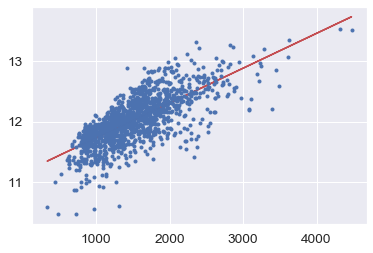

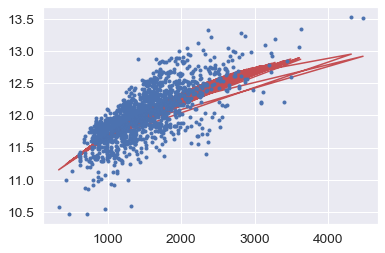

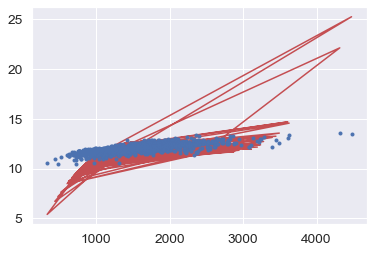

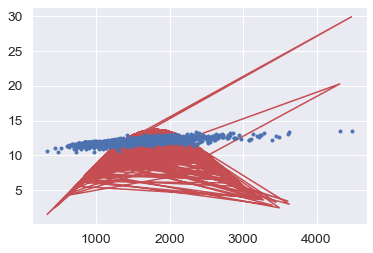

In [151]:

for i in range(1,5):
    KRR = KernelRidge(alpha=0.3, kernel='polynomial', degree=i, coef0=2.5)    
    KRR.fit(k,y_train)
    y_predm = KRR.predict(k)
    plt.tight_layout()
    plt.plot(k,y_predm,'R') 
    plt.plot(k,y_train,'.')
    plt.show()

In [153]:
import pickle
train.drop(['TotalSF'], axis=1, inplace=True)
ridgereg = Ridge(alpha=0.3,normalize=True)
ridgereg.fit(train,y_train)
pickle.dump(ridgereg, open('ridgereg.pkl','wb'))
ridgereg=pickle.load(open('ridgereg.pkl','rb'))


In [173]:
cd E:\python35

E:\python35


**WE PICKLED THE MODEL AND REAN THE APP2.PY FILE FROM COMMAND PROMPT ,WHICH PROMPTED TO THE HTML RUNNING ON PORT 5000**


NEXT WE TOOK MANUAL INPUTS


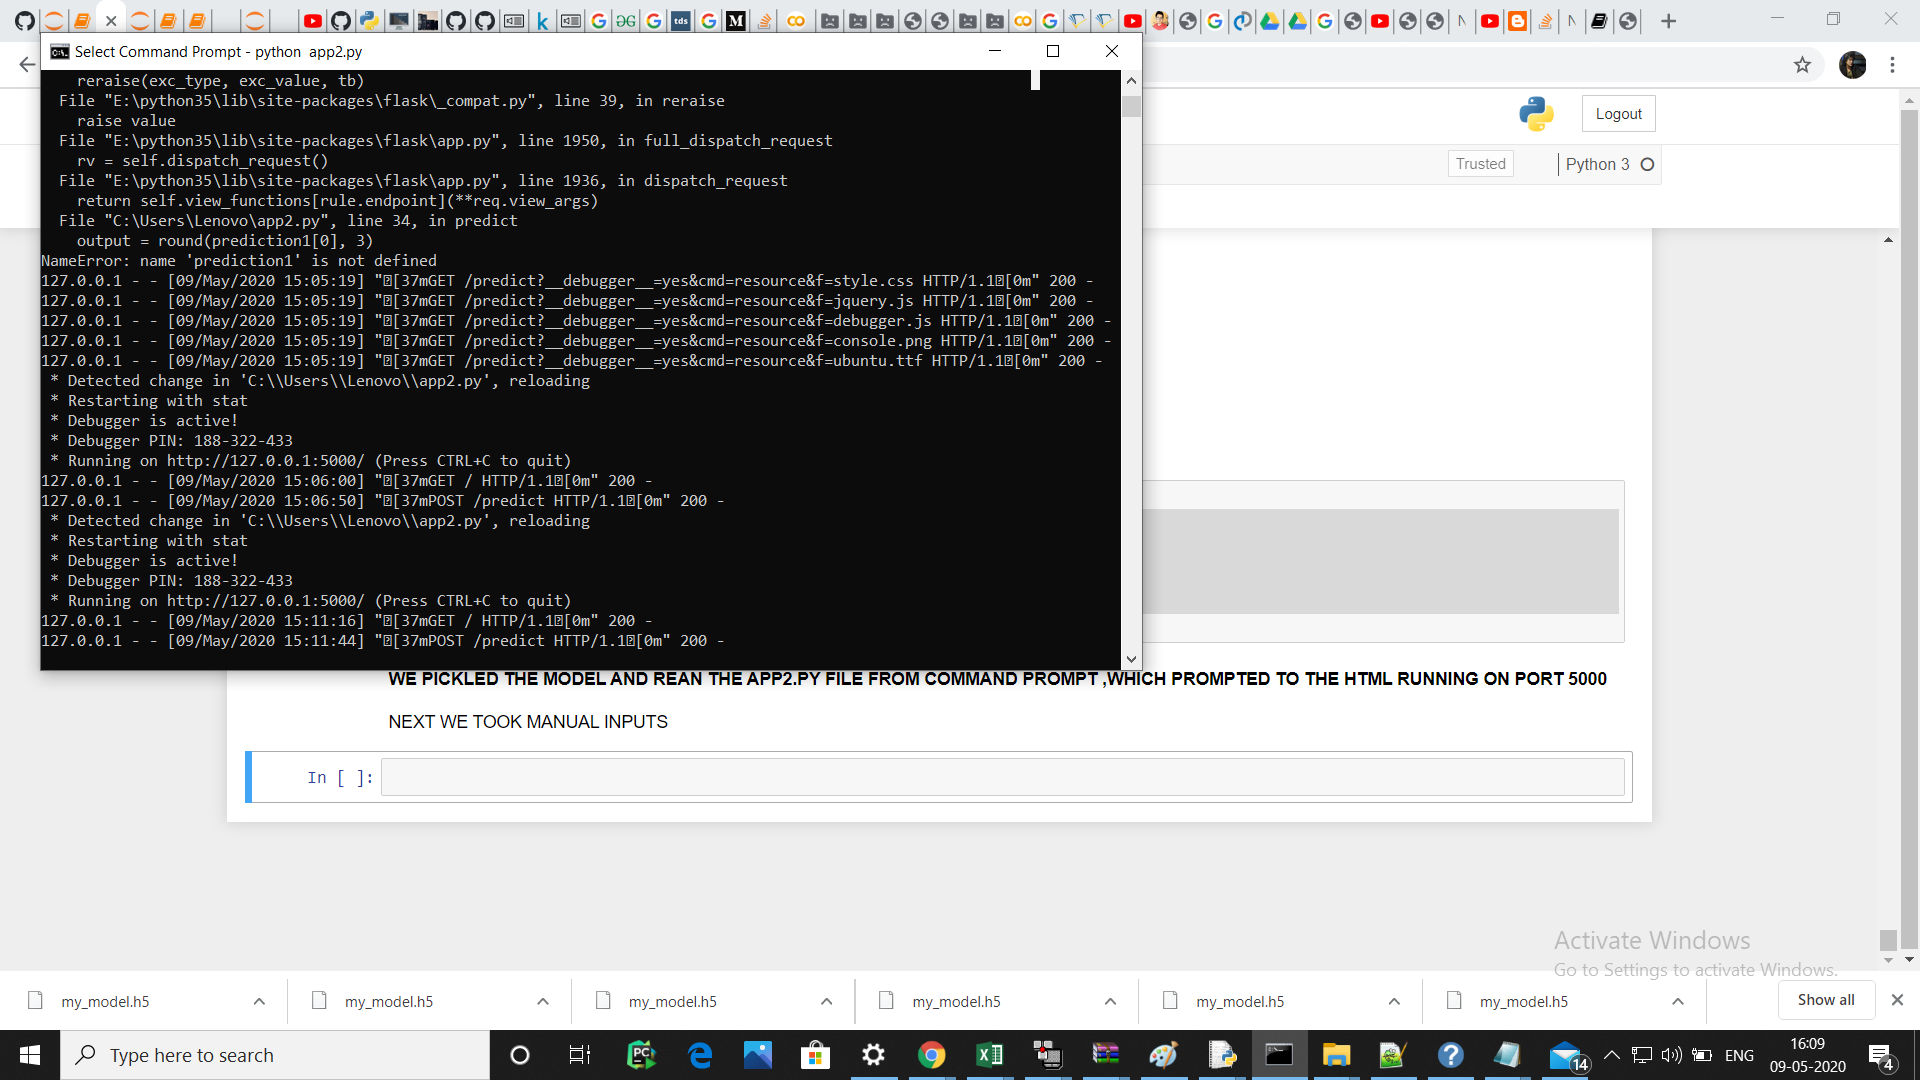

In [174]:
from IPython.display import Image
Image(filename='Screenshot (5).png')

#  FOLLOWING IS THE HTML PAGE AND THE PREDICTED PRICE SHOWN ACCORDING TO THE INPUTS PROVIDED

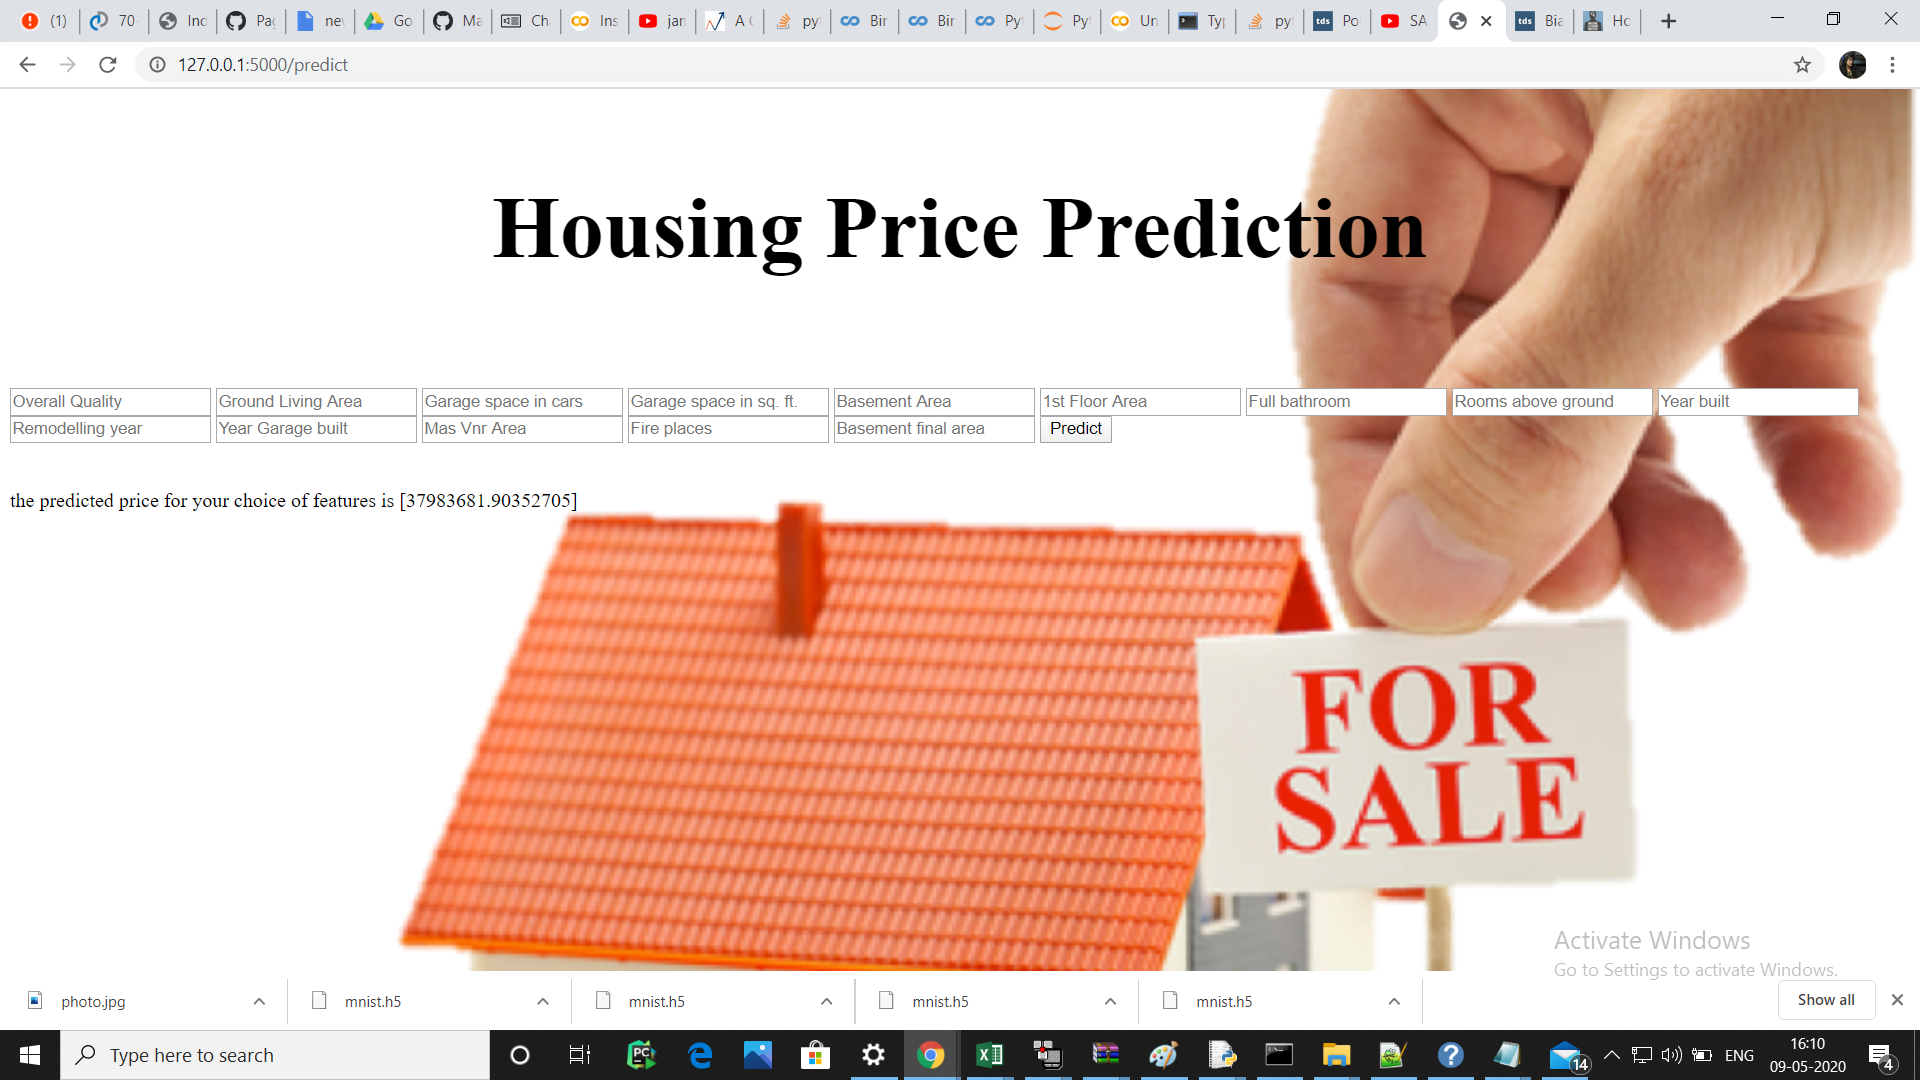

In [175]:
from IPython.display import Image
Image(filename='Screenshot (6).png')